In [1]:
import pandas as pd
import numpy as np
import requests
import urllib, json

from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing 
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_1 = data.copy()
df_2 = data.copy()
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Data dimension and  Columns type

In [3]:
print("Data shape: ", data.shape)
print("Columns Type: \n", data.dtypes)

Data shape:  (7043, 21)
Columns Type: 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## Explore the data

In [4]:
print( data.describe () )

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## Check missing values

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Split the dataset to Catigories and nummeric Values

In [6]:

data_cate = data.select_dtypes(exclude=np.number)
data_num = data.select_dtypes(include=np.number)
print(data_num.head())

   SeniorCitizen  tenure  MonthlyCharges
0              0       1           29.85
1              0      34           56.95
2              0       2           53.85
3              0      45           42.30
4              0       2           70.70


## Label encoding
 - From String Categorie to numeric Categories

In [7]:
columns = data_cate.columns
for col in columns:
    data[col] = pd.factorize(data[col])[0]
    data[col] = pd.Categorical(pd.factorize(data[col])[0])

## Change  datatype

In [8]:
data =data.astype(int, copy=True, errors='raise')
data.dtypes

customerID          int64
gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

## Features Selection
- we use the Model ExtraTreesClassifier to select the most importance columns
- i use the feature_importances function to select featiers
- use Coorelation to 

[0.10839707 0.03516144 0.02329042 0.02822454 0.02219296 0.15320162
 0.00635734 0.02845385 0.03417573 0.04814934 0.03014949 0.03026956
 0.03964965 0.02780542 0.02614883 0.07687133 0.02761069 0.05947625
 0.08759517 0.1068193 ]


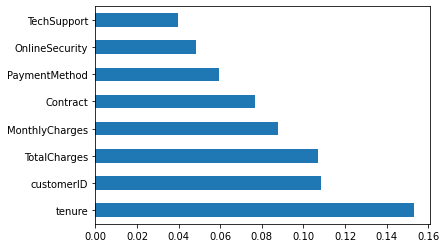

In [9]:
X = data.iloc[:,0:20] #independent columns
y = data.iloc[:,-1]#dependent column
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.
columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

## Correlation 

In [10]:
data_corr = data.iloc[:,2:].corr()
data_target_cor = data_corr[['Churn']]
data_target_cor.sort_values(['Churn'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Churn
Contract,-0.396713
tenure,-0.352229
OnlineSecurity,-0.332819
TechSupport,-0.329852
DeviceProtection,-0.281465
PaymentMethod,-0.262818
StreamingMovies,-0.207256
StreamingTV,-0.205742
PaperlessBilling,-0.191825
Dependents,-0.164221


## we need positiv Coorelation

In [11]:
data_target_cor['Churn']=data_target_cor['Churn'].apply(lambda x: x*-1 if x<0 else x)
data_target_cor

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Churn
SeniorCitizen,0.150889
Partner,0.150448
Dependents,0.164221
tenure,0.352229
PhoneService,0.011942
MultipleLines,0.036310
InternetService,0.047291
OnlineSecurity,0.332819
OnlineBackup,0.074205
DeviceProtection,0.281465


## Select only Columns with hight Correlation


In [12]:
columns = data_target_cor[data_target_cor['Churn']>=0.1].index
data = data[columns]
data.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,0,1,0,0,0,0,0,0,0,0,29,0
1,0,1,0,34,1,1,0,0,0,1,1,1,56,0
2,0,1,0,2,1,0,0,0,0,0,0,1,53,1
3,0,1,0,45,1,1,1,0,0,1,1,2,42,0
4,0,1,0,2,0,0,0,0,0,0,0,0,70,1


## Visual the Data

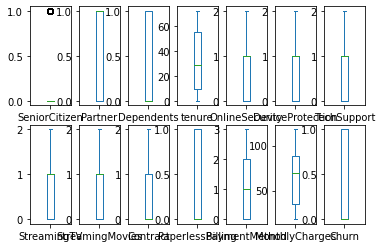

In [13]:

data.plot(kind='box', subplots=True, layout=(2,7), sharex=False,
sharey=False)
plt.show()

In [14]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'Churn'],
      dtype='object')

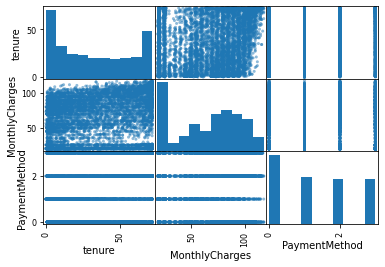

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['tenure','MonthlyCharges', 'PaymentMethod']])
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

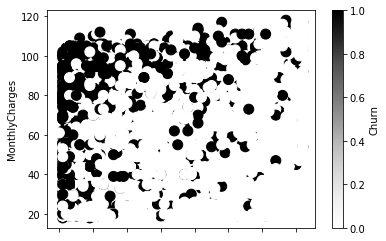

In [16]:
df=data.copy()
df.plot.scatter(x="tenure", y="MonthlyCharges", c='Churn', s=100)

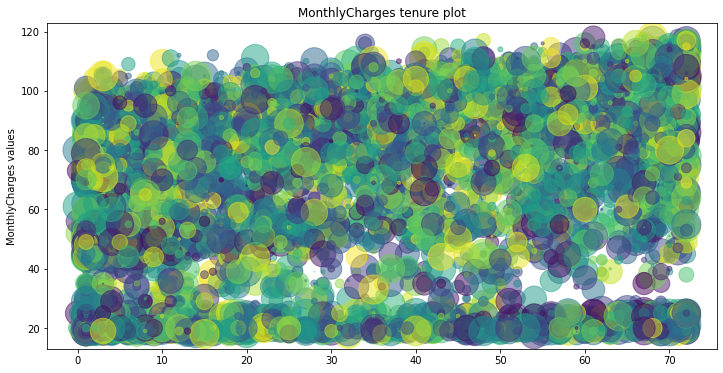

In [17]:
N = len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
x=df[["tenure"]]
y=df[["MonthlyCharges"]]
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), sharey=True)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
ax1.set_title('MonthlyCharges tenure plot')
ax1.set_ylabel('MonthlyCharges values')

plt.show()

## Customers with higth Totalcharges tend to stay

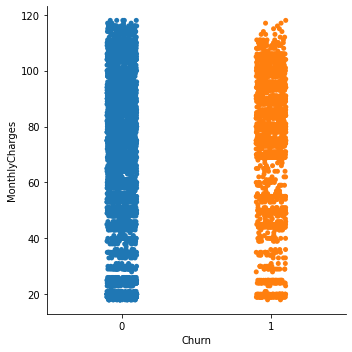

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Churn", y="MonthlyCharges", data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


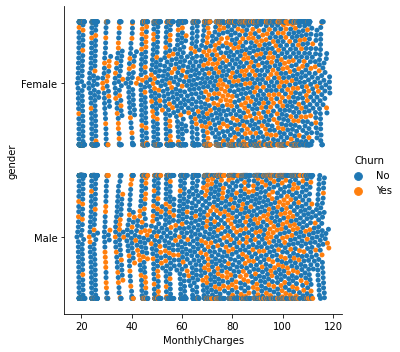

In [19]:
sns.catplot(x="MonthlyCharges", y="gender", hue="Churn", kind="swarm", data=df_1)


## plot the Distrubiton

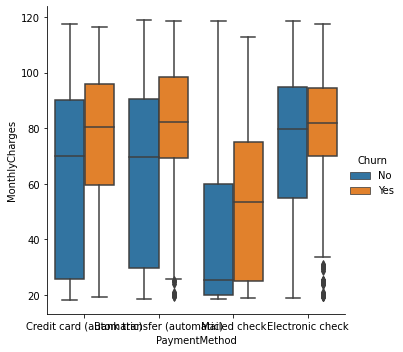

In [20]:
sns.catplot(x="PaymentMethod", y="MonthlyCharges", hue="Churn", kind="box", data=df_1.sort_values("MonthlyCharges"))

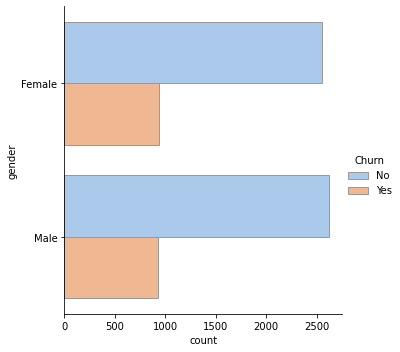

In [21]:
sns.catplot(y="gender", hue="Churn", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_1)

## Features Engineering
    - 1 TargetEncoding without smoothing

In [22]:
cols = ['OnlineSecurity', 'Partner','tenure']
data_feature = data.groupby(cols).Churn.agg(['mean', 'count', 'median']).reset_index()
data_feature.columns = cols + ['TE_mean', 'TE_count', 'TE_meadian']
data_feature.head()

,OnlineSecurity,Partner,tenure,TE_mean,TE_count,TE_meadian
0,0,0,0,0.000000,1,0.0
1,0,0,1,0.825397,63,1.0
2,0,0,2,0.515152,33,1.0
3,0,0,3,0.588235,34,1.0
4,0,0,4,0.645161,31,1.0


## Merge the Data

In [23]:
data = data.merge(data_feature, on =cols,how='left')
data.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TE_mean,TE_count,TE_meadian
0,0,0,0,1,0,0,0,0,0,0,0,0,29,0,0.825397,63,1.0
1,0,1,0,34,1,1,0,0,0,1,1,1,56,0,0.181818,11,0.0
2,0,1,0,2,1,0,0,0,0,0,0,1,53,1,0.500000,20,0.5
3,0,1,0,45,1,1,1,0,0,1,1,2,42,0,0.066667,15,0.0
4,0,1,0,2,0,0,0,0,0,0,0,0,70,1,0.671756,131,1.0


## Check the correlation

In [24]:
data.iloc[:,2:].corr()

,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TE_mean,TE_count,TE_meadian
Dependents,1.000000,0.159712,0.190523,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.113910,-0.164221,-0.220838,-0.107200,-0.145192
tenure,0.159712,1.000000,0.145298,0.178649,0.144459,0.136145,0.140781,0.671607,-0.006152,0.340305,0.247917,-0.352229,-0.680689,-0.261358,-0.528122
OnlineSecurity,0.190523,0.145298,1.000000,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.621160,-0.332819,-0.643180,-0.210044,-0.414080
DeviceProtection,0.156439,0.178649,0.749040,1.000000,0.767970,0.763279,0.766821,0.390216,0.276326,0.191746,-0.513421,-0.281465,-0.547426,-0.199179,-0.364094
TechSupport,0.180832,0.144459,0.791225,0.767970,1.000000,0.737578,0.737123,0.418440,0.310749,0.216878,-0.597536,-0.329852,-0.546722,-0.189611,-0.353189
StreamingTV,0.140395,0.136145,0.701976,0.763279,0.737578,1.000000,0.809608,0.327951,0.203907,0.117618,-0.423045,-0.205742,-0.483002,-0.196878,-0.324096
StreamingMovies,0.125820,0.140781,0.704984,0.766821,0.737123,0.809608,1.000000,0.330993,0.211818,0.123869,-0.424555,-0.207256,-0.491657,-0.193905,-0.326473
Contract,0.243187,0.671607,0.389978,0.390216,0.418440,0.327951,0.330993,1.000000,0.176733,0.358913,-0.074144,-0.396713,-0.613233,-0.142233,-0.378357
PaperlessBilling,0.111377,-0.006152,0.334003,0.276326,0.310749,0.203907,0.211818,0.176733,1.000000,0.101480,-0.352138,-0.191825,-0.189908,-0.049834,-0.102314
PaymentMethod,0.123844,0.340305,0.213800,0.191746,0.216878,0.117618,0.123869,0.358913,0.101480,1.000000,-0.074354,-0.262818,-0.348102,-0.135219,-0.256028


## ML_Model
### Scikit_Learn for Classification
## Grid Search
### SVM Model


In [25]:

y = data.Churn
x= data.drop(['Churn'],axis = 1)


X_train, X_test, y_train, y_test = train_test_split(
x, y,test_size=0.2, train_size=0.8, random_state=0)

In [26]:
for C in [0.001 ,0.01, 0.1 , 1, 10]:
    for gamma in [0.001 ,0.01, 0.1 , 1, 10]:
        for cache_size in [100,200,250]:
            sv_model = SVC(gamma = gamma, C = C,cache_size=cache_size)
            # perform cross-validation
            scores = cross_val_score(sv_model, X_test, y_test, cv=5)
            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            best_score =  0
            if score > best_score:
                best_score = score
                best_parameters = {'C': C, 'gamma': gamma}
    # rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_test, y_test)


SVC(C=10, gamma=10)

In [27]:
X_test['prediction'] =svm.predict(X_test)
pd.concat([X_test,y_test], axis = 1)
X_test.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TE_mean,TE_count,TE_meadian,prediction
2200,0,1,0,19,0,0,0,1,0,1,1,0,58,0.400000,25,0.0,0
4627,0,1,0,60,1,1,1,1,1,1,0,3,116,0.000000,11,0.0,0
3225,0,1,0,13,1,0,0,1,1,0,0,0,71,0.333333,15,0.0,0
2828,0,1,0,1,2,2,2,2,2,2,1,1,20,0.352518,139,0.0,0
3768,0,0,0,55,0,0,0,0,0,0,0,3,77,0.222222,18,0.0,0


## Metric

In [28]:
f1_score(y_test, X_test['prediction'])

0.9834254143646408

In [29]:
X_test  = X_test.drop(['prediction'],axis=1)


In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)  
X_test = min_max_scaler.fit_transform(X_test)  
x_train = np.array(X_train)
Y_train = np.array(y_train)

x_test = np.array(X_test)
y_test = np.array(y_test)

from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
Y_train = label_as_binary.fit_transform(Y_train)

In [31]:
inputs = tf.keras.layers.Input(shape=(16,))
inputs_1 = tf.keras.layers.Dense(100, activation="relu")(inputs)
inputs_2 = tf.keras.layers.Dropout(.2)(inputs_1)
inputs_3 = tf.keras.layers.Dense(10, activation="relu")(inputs_2)
inputs_4 = tf.keras.layers.Dropout(.1)(inputs_3)
inputs_5 = tf.keras.layers.Dense(5, activation="relu")(inputs_4)
outputs = tf.keras.layers.Dense(2)(inputs_3)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=["acc"])
model.metrics_names

2022-08-19 21:12:13.960601: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


[]

In [32]:
batch_size = 20
model.fit(x_train, Y_train, epochs=6, batch_size=batch_size)


2022-08-19 21:12:14.134835: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/6
282/282 [==============================] - 1s 1ms/step - loss: 0.5412 - acc: 0.4805
Epoch 2/6
282/282 [==============================] - 0s 1ms/step - loss: 0.4336 - acc: 0.4721
Epoch 3/6
282/282 [==============================] - 0s 1ms/step - loss: 0.4301 - acc: 0.4915
Epoch 4/6
282/282 [==============================] - 0s 1ms/step - loss: 0.4191 - acc: 0.4223
Epoch 5/6
282/282 [==============================] - 0s 1ms/step - loss: 0.4169 - acc: 0.4521
Epoch 6/6
282/282 [==============================] - 0s 1ms/step - loss: 0.4113 - acc: 0.4052


In [33]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)

71/71 [==============================] - 0s 775us/step - loss: 0.4325 - acc: 0.4081
